In [ ]:
#Fragestellung: Welche Produktkategorien kann unser Unternehmen mit einem hohen Rabatt einkaufen und gleichzeitig in kurzer Zeit liefern?#

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datensatz=pd.read_csv("D:/1- Analyse selbst erstellt Python/Procurement KPI Analysis Dataset.csv")

datensatz.head()

datensatz['Order_Date'] = pd.to_datetime(datensatz['Order_Date'])
datensatz['Delivery_Date'] = pd.to_datetime(datensatz['Delivery_Date'])

# Lieferzeit berechnen
datensatz['Delivery_Time'] = (datensatz['Delivery_Date'] - datensatz['Order_Date']).dt.days

# Ergebnis anzeigen
print(datensatz[['Order_Date', 'Delivery_Date', 'Delivery_Time']].head())

datensatz.head()

datensatz.describe()

print(datensatz.head())

datensatz.drop("Order_Date", axis=1)
datensatz.drop("Delivery_Date", axis=1)

  Order_Date Delivery_Date  Delivery_Time
0 2023-10-17    2023-10-25            8.0
1 2022-04-25    2022-05-05           10.0
2 2022-01-26    2022-02-15           20.0
3 2022-10-09    2022-10-28           19.0
4 2022-09-08    2022-09-20           12.0
      PO_ID         Supplier Order_Date Delivery_Date    Item_Category  \
0  PO-00001        Alpha_Inc 2023-10-17    2023-10-25  Office Supplies   
1  PO-00002  Delta_Logistics 2022-04-25    2022-05-05  Office Supplies   
2  PO-00003         Gamma_Co 2022-01-26    2022-02-15              MRO   
3  PO-00004    Beta_Supplies 2022-10-09    2022-10-28        Packaging   
4  PO-00005  Delta_Logistics 2022-09-08    2022-09-20    Raw Materials   

  Order_Status  Quantity  Unit_Price  Negotiated_Price  Defective_Units  \
0    Cancelled      1176       20.13             17.81              NaN   
1    Delivered      1509       39.32             37.34            235.0   
2    Delivered       910       95.51             92.26             41.0   
3  

,PO_ID,Supplier,Order_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Delivery_Time
0,PO-00001,Alpha_Inc,2023-10-17,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,8.0
1,PO-00002,Delta_Logistics,2022-04-25,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,10.0
2,PO-00003,Gamma_Co,2022-01-26,MRO,Delivered,910,95.51,92.26,41.0,Yes,20.0
3,PO-00004,Beta_Supplies,2022-10-09,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,19.0
4,PO-00005,Delta_Logistics,2022-09-08,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,12.0
...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,Electronics,Delivered,1685,43.42,42.24,262.0,Yes,9.0
773,PO-00774,Alpha_Inc,2022-07-23,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes,NaN
774,PO-00775,Gamma_Co,2022-03-19,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes,19.0
775,PO-00776,Beta_Supplies,2023-08-30,MRO,Delivered,1306,21.05,18.27,128.0,Yes,12.0


0
0
Clusterzentren nach 50 Iterationen:
 [[14.75        2.67207746]
 [15.69026549  9.87858407]
 [ 5.03071672  4.42774744]]

Labels nach 50 Iterationen:
 [2 0 0 0 0 0 0 0 2 0 0 0 1 1 0 1 2 2 1 0 0 0 2 0 0 1 2 1 0 2 0 2 2 2 1 1 0
 0 2 2 2 0 2 0 1 0 1 2 1 2 2 0 2 1 0 2 0 2 2 2 0 2 0 1 0 0 0 1 2 2 2 2 2 0
 0 2 2 0 2 1 2 0 2 2 0 0 1 2 0 1 0 0 2 0 2 2 2 0 0 0 0 2 0 1 1 0 2 0 1 2 1
 2 0 0 2 1 0 0 1 2 2 2 2 2 2 1 2 1 0 2 2 2 1 0 2 0 0 2 0 1 0 0 2 2 1 0 0 2
 2 1 2 0 1 2 2 2 0 0 0 0 0 2 2 0 1 2 0 2 0 2 0 2 2 1 2 0 0 0 2 1 2 0 0 0 2
 2 0 2 0 0 2 0 2 1 2 2 2 0 0 2 0 2 0 2 2 0 1 2 0 0 0 0 0 2 0 2 1 1 1 2 0 0
 2 0 2 2 1 0 2 2 1 2 0 1 2 0 2 2 2 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 1 2 1 2
 2 1 2 0 0 1 0 2 2 1 0 0 0 1 0 2 0 2 2 0 2 1 0 0 2 2 1 0 0 2 0 2 0 1 0 2 1
 2 0 1 1 2 2 1 2 1 2 2 0 0 2 0 1 2 1 2 1 0 2 2 2 1 0 0 2 2 2 2 0 0 2 0 2 0
 0 0 0 1 1 0 0 2 1 2 2 2 2 2 2 2 2 2 2 0 1 0 0 1 0 2 1 0 0 0 2 0 2 0 0 2 0
 0 0 2 0 2 0 0 1 1 2 0 2 0 1 0 2 0 2 0 0 1 0 2 2 0 2 0 2 0 0 1 0 0 2 0 2 2
 1 0 2 0 0 0 0 2 0 2 0

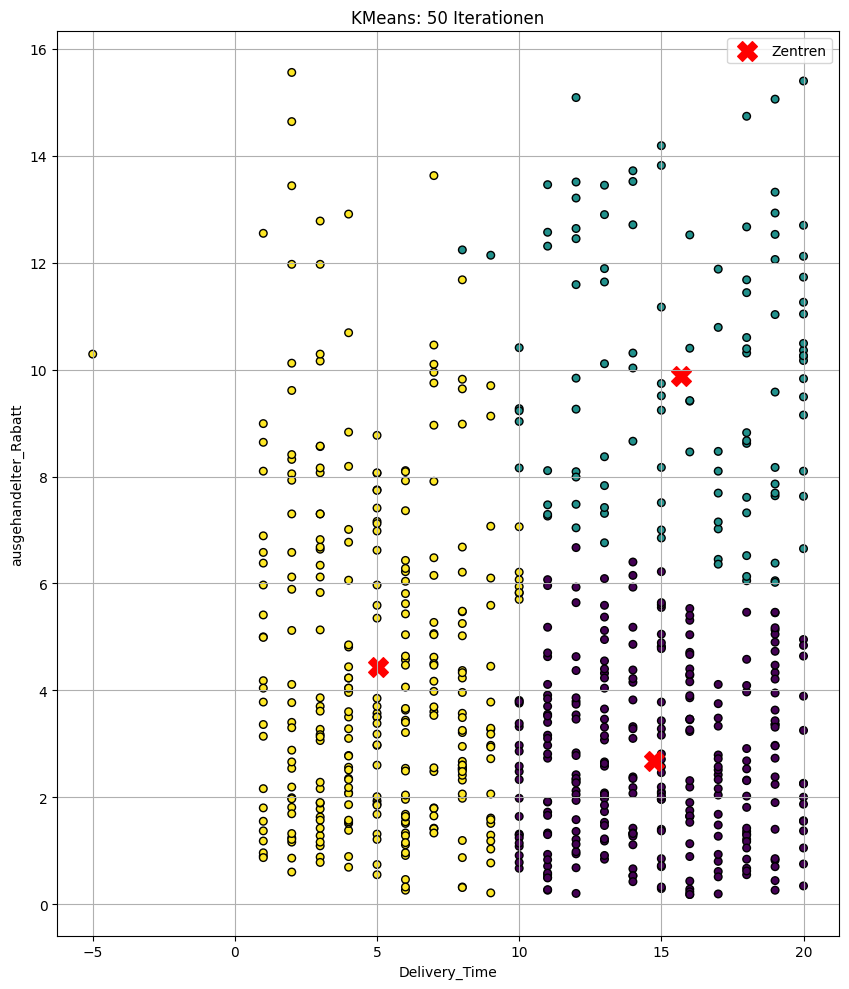

In [12]:
datensatz = datensatz.dropna(subset=["Delivery_Time"])

#neue Variable erstellen aus bestehenden Variablen -> ausgehandelter Rabatt
datensatz["ausgehandelter_Rabatt"]=datensatz["Unit_Price"]- datensatz["Negotiated_Price"]

#Prüfen, ob Nan Werte vorhanden sind in den Variablen ausgehandelter Rabatt und Delivery Time
print(datensatz["ausgehandelter_Rabatt"].isna().sum())
print(datensatz["Delivery_Time"].isna().sum())

#Die Fälle, wo Delivery Time NaN ist aus dem Datensatz komplett entfernen#
datensatz_clean = datensatz.dropna(subset=["Delivery_Time"])




#KMeans berechnen#
X=datensatz_clean[["Delivery_Time", "ausgehandelter_Rabatt"]]

from sklearn.cluster import KMeans
k = 3
kmeans3=KMeans(n_clusters=k, random_state=42)
y_pred=kmeans3.fit_predict(X)


#Folgende 3 Clusterzentren wurden gefunden
kmeans3.cluster_centers_


kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", max_iter=5, random_state=1)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", max_iter=50, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


print("Clusterzentren nach 50 Iterationen:\n", kmeans_iter3.cluster_centers_)


print("\nLabels nach 50 Iterationen:\n", kmeans_iter3.labels_)



import matplotlib.pyplot as plt

def plot_clusters(X, kmeans, title):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis', s=30, edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker='X', s=200, c='red', label='Zentren')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(25,10))


plt.subplot(1, 3, 3)
plot_clusters(X, kmeans_iter3, 'KMeans: 50 Iterationen')

plt.tight_layout()
plt.show()


In Cluster 0 ist die Delivery Time relativ gering mit einem mittleren ausgehandelten Rabatt. In Cluster 1 ist der Rabatt gering und die Lieferzeit relativ hoch. Das ist relativ ungünstig.  Cluster 2 ist der ausgehandelte Rabatt sehr hoch, jedoch auch die Lieferzeit.  --> Cluster 0 ist in dem Fall das gewünschte Cluster. 


Falls die Lieferzeit kein entscheidender Faktor wäre, könnten wir uns auch für Cluster 2 interessieren, weil der ausgehandelte Rabatt relativ hoch ist. 

In [13]:
datensatz_clean["Cluster"] = kmeans_iter3.labels_

print("Wie viele Produkte (absolut betrachtet) aus den jeweiligen Kategorien sind jeweils in welchem Cluster?")
cluster_auswertung = datensatz_clean.groupby("Cluster")["Item_Category"].value_counts()
print(cluster_auswertung)

print("Wie viel Prozent der jeweiligen Kategorien sind in den jeweiligen Clustern?")
category_percent = datensatz_clean.groupby("Item_Category")["Cluster"] \
                                  .value_counts(normalize=True) \
                                  .unstack(fill_value=0) \
                                  .round(3) * 100

print(category_percent)

Wie viele Produkte (absolut betrachtet) aus den jeweiligen Kategorien sind jeweils in welchem Cluster?
Cluster  Item_Category  
0        MRO                68
         Electronics        59
         Packaging          58
         Office Supplies    57
         Raw Materials      43
1        MRO                27
         Office Supplies    25
         Electronics        24
         Raw Materials      19
         Packaging          17
2        Office Supplies    68
         Packaging          60
         Electronics        56
         Raw Materials      55
         MRO                54
Name: count, dtype: int64
Wie viel Prozent der jeweiligen Kategorien sind in den jeweiligen Clustern?
Cluster             0     1     2
Item_Category                    
Electronics      42.4  17.3  40.3
MRO              45.6  18.1  36.2
Office Supplies  38.0  16.7  45.3
Packaging        43.0  12.6  44.4
Raw Materials    36.8  16.2  47.0


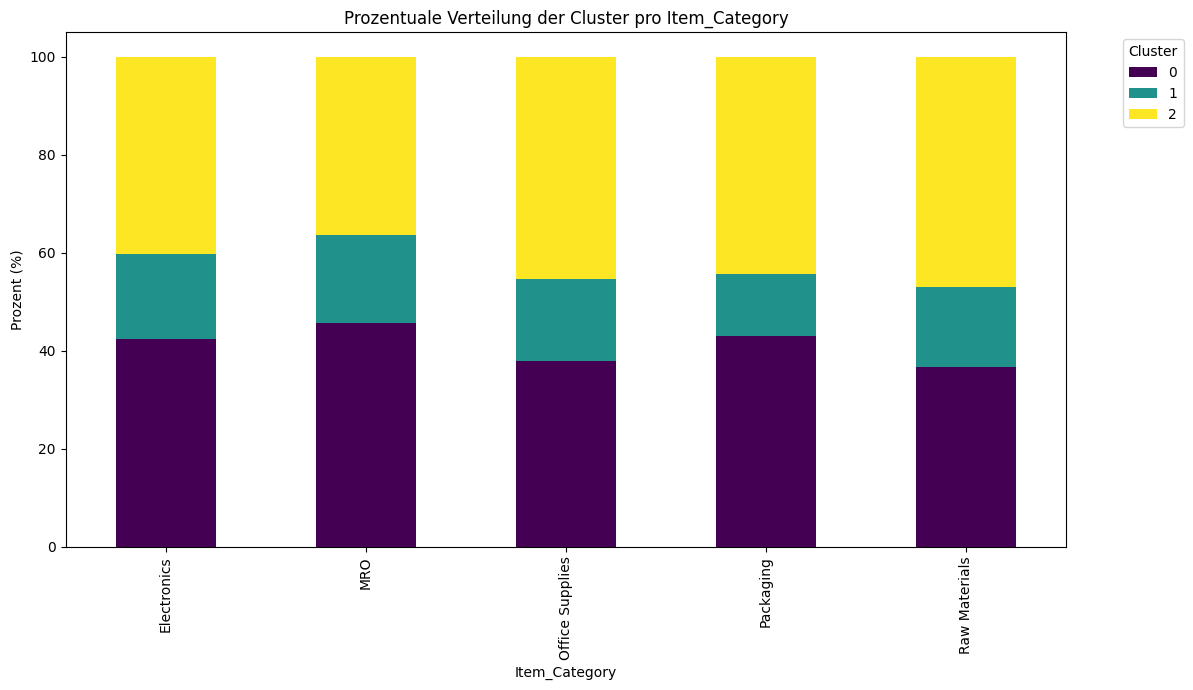

In [14]:
ax = category_percent.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Prozentuale Verteilung der Cluster pro Item_Category')
plt.xlabel('Item_Category')
plt.ylabel('Prozent (%)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Fazit: Produkte aus der Kategorie Electronics und MRO haben jeweils die höchsten Anteile im Cluster 0. Daher sollte der Augenmerk auf die Produkte dieser Kategorie gerichtet werden. Electronics und MRO Produkte sind relativ günstig einkaufbar und können schnell geliefert werden.